In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import numpy as np
from astropy.coordinates import Angle
from astropy import units as u

wfi_dec = 26.6
wfi_ra  = 29

racen = 109.25    
deccen = 63.68

def radecoffset(ra, dec, raoffset, decoffset): # position in degrees, offsets in arcmin
    raangle = Angle(ra * u.deg)  + Angle(raoffset/np.cos(np.deg2rad(dec)) * u.deg/60)
    decangle = Angle(dec * u.deg) + Angle(decoffset * u.deg/60)
    return str(int(raangle.hms.h)) + " " + str(int(raangle.hms.m)) + " " + str(round(raangle.hms.s,2)) + "   " + str(int(decangle.dms.d)) + " " + str(int(decangle.dms.m)) + " " + str(round(decangle.dms.s,2)) 

In [17]:
def draw_circle(xcen, ycen, radius):
    phi = np.arange(0,360,0.01)
    plt.plot(xcen+radius*np.sin(np.deg2rad(phi)),xcen+radius*np.cos(np.deg2rad(phi)) )
    
def draw_wfi(xcen, ycen):

    
    plt.plot(np.array([xcen-wfi_ra/2, xcen-wfi_ra/2, xcen+wfi_ra/2, xcen+wfi_ra/2, xcen-wfi_ra/2]),np.array([ycen-wfi_dec/2,ycen+wfi_dec/2,ycen+wfi_dec/2,ycen-wfi_dec/2,ycen-wfi_dec/2]))

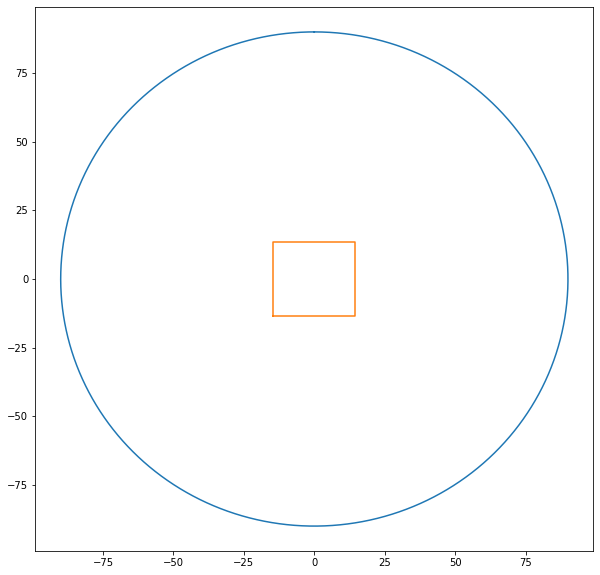

In [18]:
plt.figure(figsize = (10,10))
draw_circle(0,0,1.5*60)
draw_wfi(0,0)
#plt.xlim(-200,200)
#plt.ylim(-200,200)

2mf r
2mautofocus
2mt 60
2mradec 7 3 55.13   62 47 36.0
2mobj ligodesi_S230619bg_7 3 55.13   62 47 36.0_2441
2mo 1
2mh best
2mh calcz
2mt 60 

2mradec 7 3 55.13   63 14 12.0
2mobj ligodesi_S230619bg_7 3 55.13   63 14 12.0_2441
2mo 1
2mh best
2mh calcz
2mt 60 

2mradec 7 3 55.13   63 40 48.0
2mobj ligodesi_S230619bg_7 3 55.13   63 40 48.0_2441
2mo 1
2mh best
2mh calcz
2mt 60 

2mradec 7 3 55.13   64 7 24.0
2mobj ligodesi_S230619bg_7 3 55.13   64 7 24.0_2441
2mo 1
2mh best
2mh calcz
2mt 60 

2mradec 7 3 55.13   64 33 60.0
2mobj ligodesi_S230619bg_7 3 55.13   64 33 60.0_2441
2mo 1
2mh best
2mh calcz
2mt 60 

2mradec 7 8 16.75   62 21 0.0
2mobj ligodesi_S230619bg_7 8 16.75   62 21 0.0_2441
2mo 1
2mh best
2mh calcz
2mt 60 

2mradec 7 8 16.75   62 47 36.0
2mobj ligodesi_S230619bg_7 8 16.75   62 47 36.0_2441
2mo 1
2mh best
2mh calcz
2mt 60 

2mradec 7 8 16.75   63 14 12.0
2mobj ligodesi_S230619bg_7 8 16.75   63 14 12.0_2441
2mo 1
2mh best
2mh calcz
2mt 60 

2mradec 7 8 16.75   63 40 48.0
2mob

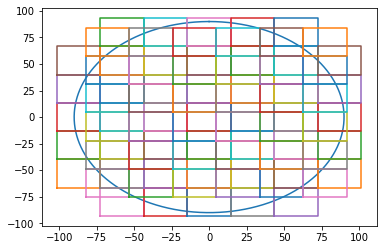

In [25]:
draw_circle(0,0,1.5*60)

n=0
superevent_name = "S230619bg"
print("2mf r") # or z? whichever is higher SNR for a 2 day old z=0.07 KN
print("2mautofocus")
print("2mt 60") # could do 45 if that gives us enough SNR already

for delta_ra in range(-3,4):
    for delta_dec in range(-3,4):
        if(delta_ra**2+delta_dec**2>=18):
            continue
        draw_wfi(delta_ra*wfi_ra,delta_dec*wfi_dec)
        print("2mradec " + radecoffset(racen, deccen, delta_ra*wfi_ra, delta_dec*wfi_dec))
        print(f"2mobj ligodesi_{superevent_name}_{radecoffset(racen, deccen, delta_ra*wfi_ra, delta_dec*wfi_dec)}_2441")
        print("2mo 1")
        print("2mh best")
        print("2mh calcz")
        print("2mt 60 \n")

        n+=1

for delta_ra in np.arange(-2.333,3.5,1): # 0.5 is ok, but could do better to cover entire chip gap with one of the other dithers
    for delta_dec in np.arange(-2.333,3.5,1):
        if(delta_ra**2+delta_dec**2>=18):
            continue
        draw_wfi(delta_ra*wfi_ra,delta_dec*wfi_dec)
        print("2mradec " + radecoffset(racen, deccen, delta_ra*wfi_ra, delta_dec*wfi_dec))
        print(f"2mobj ligodesi_{superevent_name}_{radecoffset(racen, deccen, delta_ra*wfi_ra, delta_dec*wfi_dec)}_2441")
        print("2mo 1")
        print("2mh best")
        print("2mh calcz")
        print("2mt 60")
        n+=1
# print("# that was ",n, " exposures")